In [1]:
import os
import numpy as np
import pandas as pd

from mtools import plot_fig, read_file
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/data/wjk/Workspace/Datasets/IGR')
# IGR_DIRS = ['IGR', 'IGR230307', 'IGR230312']
# IGR_DIR = 'IGR230307'

In [2]:
pos_df = pd.read_csv(f'Output/stat_pos_df.csv')
quality_count = pos_df[['phone', 'Quality', 'timestamp', 'trip']].groupby(['phone', 'Quality', 'trip']).count()
print(quality_count)

                                     timestamp
phone     Quality trip                        
Oneplus9r 2.0     23_05_03_14_23_30          5
                  23_05_03_14_33_38          1
                  23_05_03_14_43_23          2
                  23_05_03_14_53_15          1
                  23_05_03_15_16_13          6
...                                        ...
          5.0     23_05_03_18_18_05         50
                  23_05_03_21_51_05         53
                  23_05_03_22_03_37          7
                  23_05_03_22_13_43          2
                  23_05_03_22_26_13         28

[70 rows x 1 columns]


In [3]:
quality_count_table = pd.pivot_table(quality_count, 'timestamp', index=['trip'], columns=['Quality'], aggfunc=np.max)
quality_count_table.fillna(0, inplace=True)
quality_count_table = quality_count_table.astype('int16')
print(quality_count_table)
quality_count_table.to_csv('Output/quality_count_table.csv', header=True)

Quality            2.0  4.0  5.0
trip                            
23_04_25_17_20_32    0  496   24
23_04_26_15_27_59    0  520    0
23_05_03_09_10_19    0  496   24
23_05_03_09_23_45    0  520    0
23_05_03_09_39_46    0  517    3
23_05_03_09_50_41    0  520    0
23_05_03_10_00_43    0  514    6
23_05_03_10_14_11    0  520    0
23_05_03_11_05_18    0  498   20
23_05_03_11_15_35    0  520    0
23_05_03_11_27_13    0  519    1
23_05_03_12_16_32    0  519    0
23_05_03_12_30_12    0  512    8
23_05_03_12_42_28    0  520    0
23_05_03_13_15_09    0  519    1
23_05_03_13_31_39    0  486   33
23_05_03_13_42_56    0  519    0
23_05_03_14_23_30    5  416   99
23_05_03_14_33_38    1  503   16
23_05_03_14_43_23    2  499   19
23_05_03_14_53_15    1  514    4
23_05_03_15_06_31    0  488   31
23_05_03_15_16_13    6  485   29
23_05_03_16_32_54    0  520    0
23_05_03_16_49_22    0  493   26
23_05_03_17_00_27    1  508   11
23_05_03_17_10_59    0  520    0
23_05_03_17_22_50    0  483   36
23_05_03_1

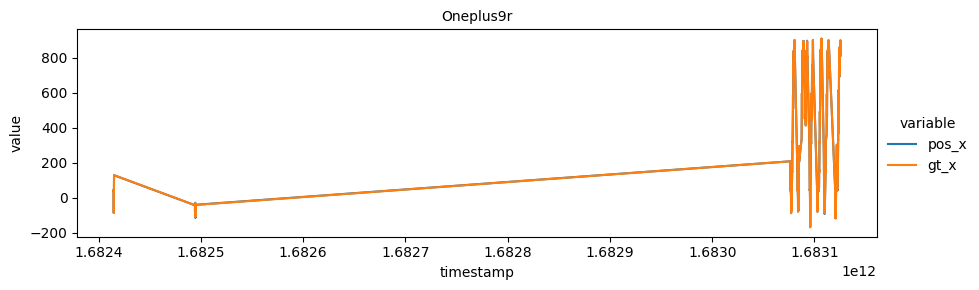

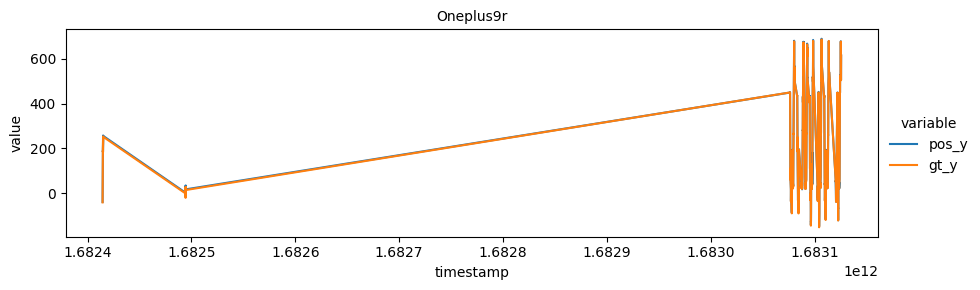

In [4]:
pos_df.columns
melt_pos_df = pd.melt(pos_df[['timestamp', 'pos_x', 'gt_x', 'phone']], id_vars=['timestamp', 'phone'], value_vars=['pos_x', 'gt_x'])
# melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

# pre_duration = 0
# duration = 20
g = sns.FacetGrid(melt_pos_df, hue='variable', col="phone", despine=False, aspect=3, sharex=False)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()

melt_pos_df = pd.melt(pos_df[['timestamp', 'pos_y', 'gt_y', 'phone']], id_vars=['timestamp', 'phone'], value_vars=['pos_y', 'gt_y'])
# melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

# pre_duration = 0
# duration = 20
g = sns.FacetGrid(melt_pos_df, hue='variable', col="phone", despine=False, aspect=3, sharex=False)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()